In [96]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [97]:
# Open and read both data files
mouse_metadata_file = "Resources/Mouse_metadata.csv"
study_results_file = "Resources/Study_results.csv"

In [98]:
# Read and preview the data in a datafram
mouse_metadata_master = pd.read_csv(mouse_metadata_file)
mouse_metadata_master.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [99]:
study_results_master = pd.read_csv(study_results_file)
study_results_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [100]:
# Merge the dataframes
compiled_data_master = pd.merge(study_results_master, mouse_metadata_master, on="Mouse ID")
compiled_data_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [101]:
# Confirm each row is unique
# Many thanks to Stephanie Richards for her help!
duplicates = compiled_data_master[compiled_data_master.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [102]:
# Drop data for duplicated mouse
# df.loc[df['shield'] > 6]
cleaned_master = compiled_data_master.loc[compiled_data_master["Mouse ID"] != "g989"]
cleaned_master

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [103]:
# Summary Statistics Table
# mean, median, variance, STD, SEM of tumor volume for EACH drug regimen

In [104]:
drug_groups = cleaned_master.groupby("Drug Regimen")
mean_tumor_volume = drug_groups["Tumor Volume (mm3)"].mean()
# mean_tumor_volume
median_tumor_volume = drug_groups["Tumor Volume (mm3)"].median()
# median_tumor_volume
variance_tumor_volume = drug_groups["Tumor Volume (mm3)"].var()
# variance_tumor_volume
STD_tumor_volume = drug_groups["Tumor Volume (mm3)"].std()
# STD_tumor_volume
SEM_tumor_volume = drug_groups["Tumor Volume (mm3)"].sem()
# SEM_tumor_volume

In [105]:
# Start building summary table
Summary_Statistics_Table = pd.DataFrame({
    "Mean of Tumor Volume": mean_tumor_volume, 
    "Median of Tumor Volume": median_tumor_volume,
    "Variance of Tumor Volume": variance_tumor_volume,
    "Standard Deviation of Tumor Volume": STD_tumor_volume,
    "SEM of Tumor Volume": SEM_tumor_volume
})
Summary_Statistics_Table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [106]:
# Make two identical bar charts with two different methods
# First with DataFrame.plot()
# Second with Matplotlib pyplot

In [140]:
# But first assemble the data to plot
cleaned_master.groupby("Drug Regimen").count()
count_of_measurements = drug_groups["Timepoint"].count()
# count_of_measurements

list_of_regimens = cleaned_master["Drug Regimen"].unique()
alpha_regimens = sorted(list_of_regimens)
alpha_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

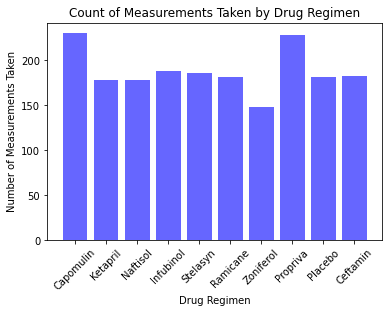

In [141]:
# Well, let's fumble through with matplotlib
# Could be worse, but it's here, so I guess I'll move on and come back
y_axis = count_of_measurements
x_axis = np.arange(len(alpha_regimens))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="blue", alpha=0.6, align="center")

# Make it nicer

plt.title("Count of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_of_regimens, rotation="45")

plt.show()


In [135]:
# Now to try with DataFrame.plot I guess

count_of_measurements_df = pd.DataFrame({
    "Drug Regimen": list_of_regimens,
    "Count of Measurement": count_of_measurements
})

# df.reset_index(drop=True)

# count_of_measurements_df.reset_index(drop=True)

count_of_measurements_df

,Drug Regimen,Count of Measurement
Drug Regimen,,
Capomulin,Capomulin,230
Ceftamin,Ketapril,178
Infubinol,Naftisol,178
Ketapril,Infubinol,188
Naftisol,Stelasyn,186
Placebo,Ramicane,181
Propriva,Zoniferol,148
Ramicane,Propriva,228
Stelasyn,Placebo,181


In [134]:
count_of_measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

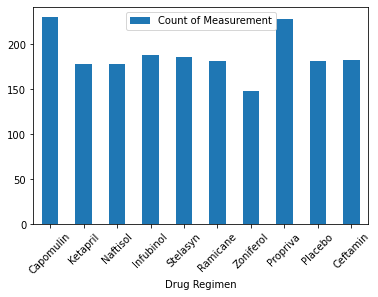

In [132]:
ax = count_of_measurements_df.plot.bar(x="Drug Regimen", y="Count of Measurement", rot=45)
ax